In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split



In [3]:

# Load ARFF file
data = arff.loadarff('OliveOil_TRAIN.arff')

# Convert to DataFrame
df = pd.DataFrame(data[0])

# # Transpose the DataFrame
# df = df.T

# Display the first few rows
df.head()


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att562,att563,att564,att565,att566,att567,att568,att569,att570,target
0,-0.611375,-0.610586,-0.606557,-0.601132,-0.594315,-0.585762,-0.577419,-0.570175,-0.563285,-0.557407,...,-0.980385,-0.980328,-0.980220,-0.980691,-0.981337,-0.982336,-0.983213,-0.983672,-0.983120,b'1'
1,-0.615392,-0.613729,-0.609228,-0.604315,-0.598768,-0.590507,-0.581617,-0.572926,-0.565374,-0.559907,...,-0.979335,-0.979523,-0.980038,-0.981146,-0.982332,-0.982570,-0.982630,-0.982850,-0.982549,b'1'
2,-0.611999,-0.610500,-0.606374,-0.600445,-0.593084,-0.585245,-0.577118,-0.568827,-0.561596,-0.556093,...,-0.979663,-0.979964,-0.980563,-0.981326,-0.982744,-0.983107,-0.983033,-0.983956,-0.983858,b'1'
3,-0.622784,-0.622222,-0.619049,-0.613251,-0.605889,-0.597508,-0.589047,-0.580697,-0.572822,-0.566727,...,-0.969902,-0.970586,-0.970718,-0.971197,-0.972268,-0.972654,-0.972861,-0.973671,-0.973614,b'1'
4,-0.621793,-0.621272,-0.617298,-0.612074,-0.605472,-0.597607,-0.589165,-0.581424,-0.574620,-0.568411,...,-0.977831,-0.978376,-0.978778,-0.979656,-0.981148,-0.981796,-0.981331,-0.981289,-0.981331,b'1'


In [4]:
print(df.shape)

(30, 571)


In [5]:
# Load ARFF file
data = arff.loadarff('OliveOil_TEST.arff')

# Convert to DataFrame
df_test = pd.DataFrame(data[0])

# # Transpose the DataFrame
# df = df.T

# Display the first few rows
df_test.head()


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att562,att563,att564,att565,att566,att567,att568,att569,att570,target
0,-0.621957,-0.620677,-0.616684,-0.611012,-0.603769,-0.595267,-0.586477,-0.577899,-0.570147,-0.564274,...,-0.967106,-0.967484,-0.967454,-0.967817,-0.968638,-0.969142,-0.969541,-0.970344,-0.970377,b'1'
1,-0.618925,-0.618361,-0.614664,-0.608693,-0.601446,-0.593516,-0.585786,-0.577708,-0.569952,-0.563845,...,-0.971990,-0.972353,-0.973022,-0.973667,-0.973943,-0.974423,-0.974906,-0.975525,-0.975858,b'1'
2,-0.618169,-0.616704,-0.612678,-0.607578,-0.600574,-0.592209,-0.584307,-0.576085,-0.567684,-0.561432,...,-0.976940,-0.977284,-0.977284,-0.977531,-0.978806,-0.979570,-0.979820,-0.980319,-0.980089,b'1'
3,-0.613445,-0.611719,-0.607739,-0.602477,-0.595154,-0.587271,-0.579135,-0.570903,-0.563252,-0.557242,...,-0.977072,-0.977317,-0.977812,-0.978423,-0.979332,-0.979976,-0.980131,-0.980358,-0.980385,b'1'
4,-0.616338,-0.615301,-0.611505,-0.605503,-0.597522,-0.589108,-0.580610,-0.572432,-0.565709,-0.559617,...,-0.975242,-0.975344,-0.975936,-0.976761,-0.977364,-0.977648,-0.978043,-0.978808,-0.978584,b'1'


In [6]:
df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att561,att562,att563,att564,att565,att566,att567,att568,att569,att570
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-0.611895,-0.610648,-0.606697,-0.601020,-0.593792,-0.585476,-0.577100,-0.568880,-0.561298,-0.555327,...,-0.976487,-0.977011,-0.977404,-0.977851,-0.978500,-0.979447,-0.979884,-0.979993,-0.980466,-0.980602
std,0.007103,0.007094,0.007025,0.006931,0.007014,0.007098,0.007005,0.006994,0.007035,0.007000,...,0.006211,0.006145,0.006196,0.006212,0.006270,0.006313,0.006392,0.006372,0.006364,0.006407
min,-0.622784,-0.622222,-0.619049,-0.613251,-0.606484,-0.598921,-0.590348,-0.582025,-0.574668,-0.568545,...,-0.995849,-0.996575,-0.997365,-0.997696,-0.998277,-0.999678,-1.000187,-1.000031,-1.000642,-1.001061
25%,-0.615420,-0.614054,-0.609959,-0.604032,-0.596716,-0.588481,-0.579605,-0.571327,-0.563762,-0.557526,...,-0.978997,-0.979154,-0.979423,-0.979826,-0.980450,-0.981289,-0.982201,-0.982305,-0.982654,-0.982617
50%,-0.611913,-0.610543,-0.606757,-0.601161,-0.593762,-0.585272,-0.577268,-0.569677,-0.561556,-0.555934,...,-0.975869,-0.976176,-0.976744,-0.977298,-0.977871,-0.978881,-0.979175,-0.979325,-0.979627,-0.980093
75%,-0.609884,-0.608681,-0.604591,-0.599247,-0.591120,-0.582454,-0.574215,-0.565808,-0.558239,-0.551438,...,-0.972170,-0.973330,-0.973860,-0.974376,-0.974811,-0.975666,-0.976206,-0.976166,-0.976381,-0.976528
max,-0.590921,-0.589520,-0.586062,-0.582049,-0.575003,-0.566571,-0.559088,-0.551611,-0.544998,-0.539241,...,-0.968274,-0.968620,-0.968871,-0.969230,-0.970103,-0.971065,-0.971451,-0.971528,-0.971549,-0.971597


In [7]:
df['target'] = df['target'].apply(lambda x: x.decode('utf-8').replace('b', ''))

df_test['target'] = df_test['target'].apply(lambda x: x.decode('utf-8').replace('b', ''))

print( df['target'].value_counts())

4    13
2     8
1     5
3     4
Name: target, dtype: int64


In [8]:
# df_total = pd.concat([df, df_test], ignore_index=True)

X_train = df.drop('target', axis=1)
y_train = df['target']

X_test = df_test.drop('target', axis=1)
y_test = df_test['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NAIVE BAYES MODEL



In [9]:


# Train a Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)




Accuracy: 0.9
Precision: 0.8916666666666666
Recall: 0.8666666666666666
F1-score: 0.8757309941520468
Confusion matrix: 
[[ 4  0  1  0]
 [ 0  9  0  0]
 [ 0  0  3  1]
 [ 0  1  0 11]]


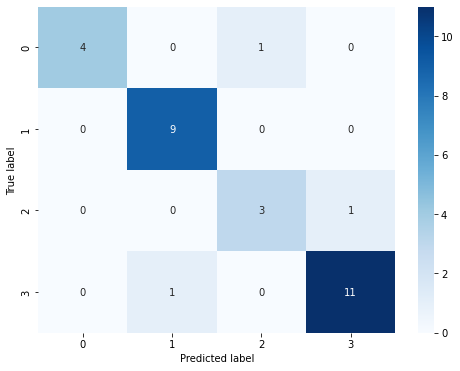

In [10]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion matrix: \n{cm}")
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

KNN MODEL


In [11]:
# Import KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)


c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9
Precision: 0.9128787878787878
Recall: 0.8541666666666666
F1-score: 0.8580698287220025


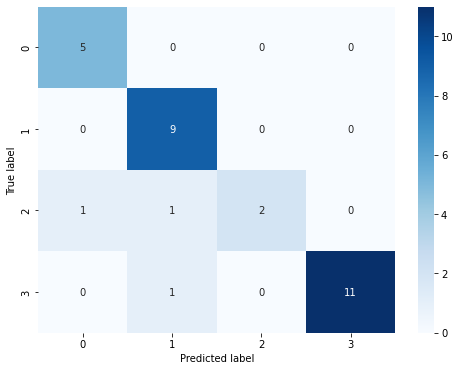

In [12]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
# print(f"Confusion matrix: \n{cm}")
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

LDA (Linear Descriminate Analysis)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create LDA model
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train, y_train)

# Predict on the test data
y_pred = lda.predict(X_test)


Accuracy: 0.9
Precision: 0.9365384615384615
Recall: 0.8541666666666666
F1-score: 0.8735087719298246


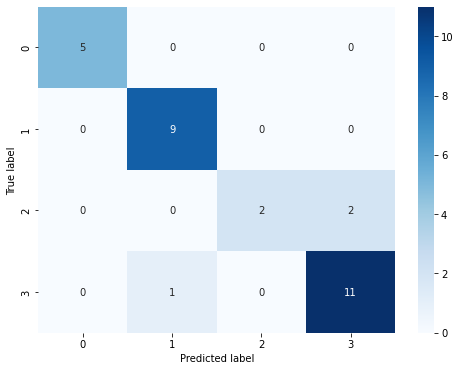

In [14]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
# print(f"Confusion matrix: \n{cm}")
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Decision Tree


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)



Accuracy: 0.9333333333333333
Precision: 0.9557692307692307
Recall: 0.875
F1-score: 0.8935087719298246


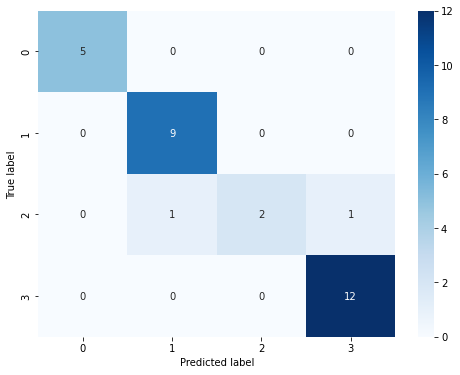

In [16]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
# print(f"Confusion matrix: \n{cm}")
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Artificial Neural Networks (ANN)

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.utils import np_utils

# convert target variable to one-hot encoding
y_train_ann = np_utils.to_categorical(y_train)[:, -4:]
y_test_ann = np_utils.to_categorical(y_test)[:, -4:]

# define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=570))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model to the training data
model.fit(X_train, y_train_ann, epochs=50, batch_size=3, verbose=1)

# evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test_ann, verbose=0)
print('Accuracy: ',(accuracy))

Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.8371 - accuracy: 0.3333
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.3333
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6063 - accuracy: 0.4000
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5820 - accuracy: 0.4333
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6527 - accuracy: 0.2333
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.4000
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.4000
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.3667
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5674 - accuracy: 0.3667
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.4000
Epoch 11/50
10/10 [

In [18]:
import numpy as np
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)

1/1 [==============================] - 0s 77ms/step
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [19]:
print(y_test_ann)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [20]:
print(y_train_ann)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


SVM


c:\Users\Mohamed Boutaieb\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'C': 10, 'kernel': 'linear'}
Mean cross-validation score:  0.8333333333333334
Classification report: 
               precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       0.60      1.00      0.75         9
           3       1.00      0.25      0.40         4
           4       0.92      0.92      0.92        12

    accuracy                           0.77        30
   macro avg       0.88      0.64      0.66        30
weighted avg       0.85      0.77      0.74        30



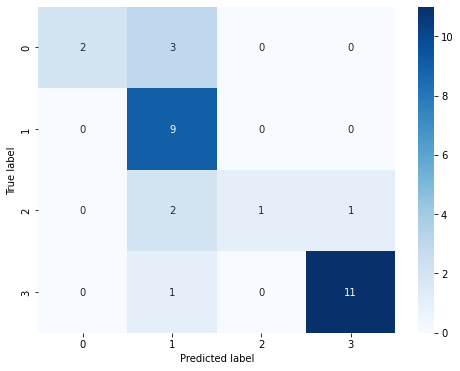

In [21]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# define the SVM classifier
svm_clf = svm.SVC()

# define the parameter grid for hyperparameter tuning using grid search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the mean cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Mean cross-validation score: ", grid_search.best_score_)

# predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# print the classification report and confusion matrix
print("Classification report: \n", classification_report(y_test, y_pred))
# print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
# plot_confusion_matrix(svm_model, X_test, y_test)
# plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
# print(f"Confusion matrix: \n{cm}")

Accuracy: 0.7666666666666667
Precision: 0.8791666666666667
Recall: 0.6416666666666666
F1-score: 0.6595238095238095
